In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

# Read the dataset


In [2]:
df = pd.read_csv("titanic_dataset (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check and handle missing values in the dataset


In [5]:
df1=df


In [6]:
df1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing Values in Age column, 687 missing Values in Cabin column ,and 2 missing Values in Embarked column.



0.38910778230082704


C:\Users\Monita Diyol Joseph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

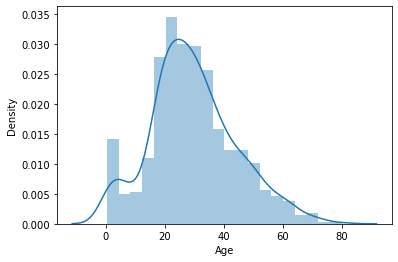

In [7]:
import warnings
print(df1["Age"].skew())
sns.distplot(df1["Age"])

Since the value of skewness is between -0.5 and 0.5 we can consider the data to be fairly symmetrical.



In [8]:
df1["Age"] = df1["Age"].fillna(df1["Age"].median())
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Next , Handling NaN in the Cabin

In [9]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Cabin_mode = df1["Cabin"].mode()
#Cabin_mode

In [11]:
#df1["Cabin"] = df1["Cabin"].fillna("C123")
#df1

In [12]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Next , Handling NaN in the Embarked

Since "Embarked" is a categorical feature, for now we can use the Mode to fill in the missing values.

In [13]:
Embarked_mode = df1["Embarked"].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [14]:
df1["Embarked"] = df1["Embarked"].fillna("Q")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We've handled all the missing values in the Dataset

# Checking for Outliers in Age Column.


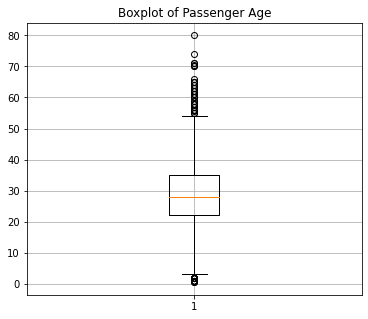

In [15]:
plt.figure(figsize=(6,5))
plt.boxplot(df1["Age"])
plt.title("Boxplot of Passenger Age")
plt.grid();

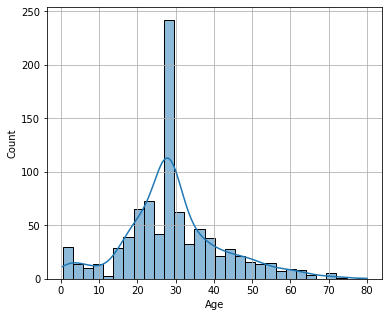

In [16]:
plt.figure(figsize = (6,5))
sns.histplot(data = df1, x= "Age",kde=True);
plt.grid()

In [17]:
df1["Age"].skew()

0.5102446555756495

In [18]:
Q1 = df1['Age'].quantile(0.25)
Q2 = df1['Age'].quantile(0.5)
Q3 = df1["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["Age"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df1[(df1["Age"] > upper_limit)|(df1["Age"] < lower_limit)].index
print(f"\n{index}")
df1.drop(index, inplace=True)
df1.describe()

Q1 = 22.0, 
Q2 = 28.0,
Q3 = 35.0, 
IQR = 13.0, 

Lower limit = 2.5,
Upper limit = 54.5

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,447.369697,0.380606,2.341818,28.515152,0.507879,0.357576,31.483615
std,257.088865,0.485830,0.824096,10.177256,1.090670,0.798599,49.956429
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700
75%,671.000000,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,891.000000,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


# Handling the Outliers in SibSp column


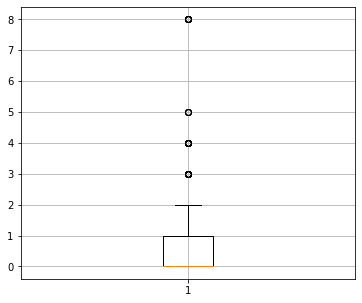

In [19]:
plt.figure(figsize=(6,5))
plt.boxplot(data=df1, x = "SibSp");

plt.grid();

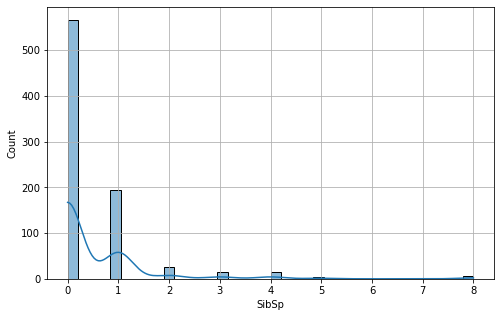

In [20]:
plt.figure(figsize = (8,5))
sns.histplot(data = df1, x= "SibSp",kde=True);
plt.grid()

In [21]:
Q1 = df1['SibSp'].quantile(0.25)
Q2 = df1['SibSp'].quantile(0.5)
Q3 = df1["SibSp"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["SibSp"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df1[(df1["SibSp"] > upper_limit)|(df1["SibSp"] < lower_limit)].index
print(f"\n{index}")
df1.drop(index, inplace=True)
df1.describe()

Q1 = 0.0, 
Q2 = 0.0,
Q3 = 1.0, 
IQR = 1.0, 

Lower limit = -1.5,
Upper limit = 2.5

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,450.604326,0.390585,2.318066,29.114504,0.311705,0.296438,30.295599
std,255.379119,0.488192,0.828231,9.814762,0.527743,0.757073,48.962228
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,232.750000,0.000000,2.000000,23.125000,0.000000,0.000000,7.895800
50%,449.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,670.750000,1.000000,3.000000,34.000000,1.000000,0.000000,27.750000
max,891.000000,1.000000,3.000000,54.000000,2.000000,6.000000,512.329200


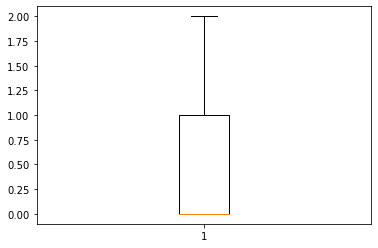

In [22]:
plt.boxplot(data=df1, x = "SibSp");


# Handling the outliers in "Fare" feature


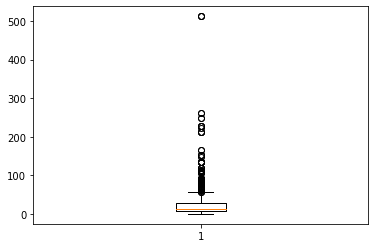

In [23]:
plt.boxplot(df1["Fare"]);


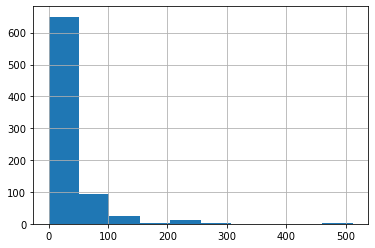

In [24]:
df1["Fare"].hist();


In [25]:
df1["Fare"].skew()

5.171880411402845

In [26]:
Q1 = df1['Fare'].quantile(0.25)
Q2 = df1['Fare'].quantile(0.5)
Q3 = df1["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["Fare"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

index = df1[(df1["Fare"] > upper_limit)|(df1["Fare"] < lower_limit)].index
print(index)
df1.drop(index, inplace=True)
df1.describe()

Q1 = 7.8958, 
Q2 = 13.0,
Q3 = 27.75, 
IQR = 19.8542, 

Lower limit = -21.885499999999997,
Upper limit = 57.5313
Int64Index([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=102)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,451.592105,0.339181,2.504386,28.612573,0.271930,0.267544,16.317275
std,258.938313,0.473778,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,450.500000,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.250000,1.000000,3.000000,33.000000,0.000000,0.000000,23.062500
max,891.000000,1.000000,3.000000,54.000000,2.000000,6.000000,57.000000


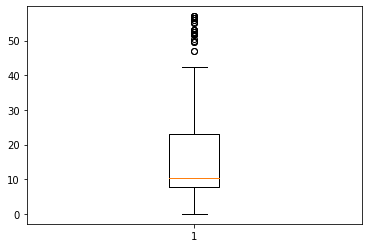

In [27]:
plt.boxplot(df1["Fare"]);


# Performing the min max scaling


In [28]:
df1.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


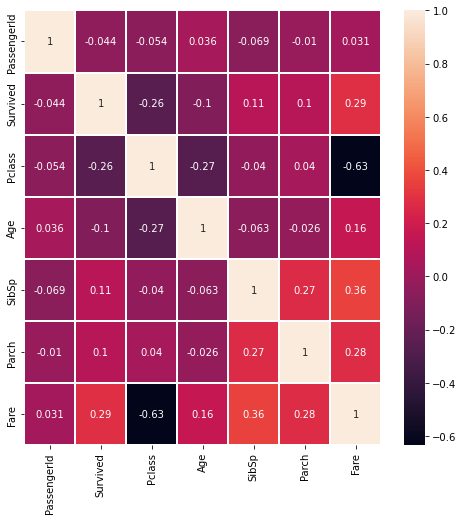

In [29]:
corr = df1.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True,linewidths=0.2);

In [30]:
X = df1.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,3,22.0,1,0,7.2500,NaN
2,3,3,26.0,0,0,7.9250,NaN
3,4,1,35.0,1,0,53.1000,C123
4,5,3,35.0,0,0,8.0500,NaN
5,6,3,28.0,0,0,8.4583,NaN
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,NaN
887,888,1,19.0,0,0,30.0000,B42
888,889,3,28.0,1,2,23.4500,NaN
889,890,1,26.0,0,0,30.0000,C148


In [31]:
X.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,451.592105,2.504386,28.612573,0.271930,0.267544,16.317275
std,258.938313,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,223.750000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,450.500000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.250000,3.000000,33.000000,0.000000,0.000000,23.062500
max,891.000000,3.000000,54.000000,2.000000,6.000000,57.000000


# Classification


In [32]:
df2_train = df1


In [33]:
corr_matrix = df2_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.286069
SibSp          0.110493
Parch          0.101948
PassengerId   -0.044449
Age           -0.103664
Pclass        -0.259471
Name: Survived, dtype: float64

In [34]:
df2_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  684 non-null    int64  
 1   Survived     684 non-null    int64  
 2   Pclass       684 non-null    int64  
 3   Name         684 non-null    object 
 4   Sex          684 non-null    object 
 5   Age          684 non-null    float64
 6   SibSp        684 non-null    int64  
 7   Parch        684 non-null    int64  
 8   Ticket       684 non-null    object 
 9   Fare         684 non-null    float64
 10  Cabin        94 non-null     object 
 11  Embarked     684 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 69.5+ KB


In [35]:
q = [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df2_train.drop(q, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S
5,0,3,male,8.4583,Q


In [36]:
z = [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df2_train.drop(z, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S
5,0,3,male,8.4583,Q


# Translate non-numerical features to numerical features


In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:, 4] = labelencoder.fit_transform(df_train_set.iloc[:, 4].values)

In [38]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  684 non-null    int64  
 1   Pclass    684 non-null    int64  
 2   Sex       684 non-null    int32  
 3   Fare      684 non-null    float64
 4   Embarked  684 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 26.7 KB


# Train data split


In [39]:
x = df_train_set.iloc[:, 1:5].values
y = df_train_set.iloc[:, 0].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.4)
x_train.shape

(410, 4)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(410, 4)
(274, 4)
(410,)
(274,)


# 1) Logistic Regression Model
# 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

y_train_pred = model.predict(x_train) #To checking training data prediction & accuracy in future

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("\nThe accuracy score of LR model is : ", accuracy_score(y_test,predict))
print("The F1 score of LR model is : ", f1_score(y_test,predict,average="micro"))
print("\nThe accuracy score of LR model is : \n", confusion_matrix(y_test,predict))

Training Accuracy is :  0.802439024390244

The accuracy score of LR model is :  0.7627737226277372
The F1 score of LR model is :  0.7627737226277372

The accuracy score of LR model is : 
 [[145  28]
 [ 37  64]]


# 2) KNN Model


In [43]:
from sklearn.neighbors import KNeighborsClassifier


classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("\nThe accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))
print("\nThe confusion matrix of KNN model is : \n", confusion_matrix(y_test,predict1))

Training Accuracy is :  0.8390243902439024

The accuracy score of KNN model is :  0.7773722627737226
The F1 score of KNN model is :  0.7773722627737226

The confusion matrix of KNN model is : 
 [[164   9]
 [ 52  49]]


# 3) SVM Model


In [44]:
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
predict2a = svm_linear.predict(x_test)

y_train_pred2a = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2a))
print("\nThe accuracy score of linear SVM model is : ", accuracy_score(y_test,predict2a))
print("The f1 score of linear SVM model is : ", f1_score(y_test,predict2a, average="micro"))
print("\nThe confusion matrix for linear SVM model is : \n", confusion_matrix(y_test,predict2a))


Training Accuracy is :  0.8048780487804879

The accuracy score of linear SVM model is :  0.7664233576642335
The f1 score of linear SVM model is :  0.7664233576642334

The confusion matrix for linear SVM model is : 
 [[148  25]
 [ 39  62]]


# 4) Decision Tree Model


In [45]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict3 = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("\nThe accuracy score of Decision tree model is : ", accuracy_score(y_test,predict3))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict3,average="micro"))
print("\nThe confusion matrix of Decision tree model is : \n", confusion_matrix(y_test,predict3))

Training Accuracy is :  0.9073170731707317

The accuracy score of Decision tree model is :  0.7883211678832117
The f1 score of Decision tree model is :  0.7883211678832118

The confusion matrix of Decision tree model is : 
 [[153  20]
 [ 38  63]]


# 5) Random Forest Classifier Model


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
predict4 = rf_model.predict(x_test)

y_train_pred4 = rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print("\nThe accuracy score for Random Forest Model is : ", accuracy_score(y_test,predict4))
print("The f1 score is : ", f1_score(y_test,predict4,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict4))

Training Accuracy is :  0.9073170731707317

The accuracy score for Random Forest Model is :  0.8029197080291971
The f1 score is :  0.8029197080291971

 The confusion matrix is : 
 [[156  17]
 [ 37  64]]
